# Introduction
Naïve Bayes classifiers are widely recognized for their efficacy at classifying text data (e.g., sentiment analysis).

I'm going to construct a Naïve Bayes sentiment classifier that can identify the sentiment of movie reviews.

The data set is sourced from the Cornell University: http://www.cs.cornell.edu/people/pabo/movie-review-data/

The tasks of this assignment are:

1) Loading positive and negative movie reviews form my Github.  2) Removing keywords, speical character (like ~!@#).  3) Converting a collection of text documents to a matrix of token counts.  4) Training a Naïve Bayes classifier model and evaluating the model by test set. 5) Gauging a new comment whether is positive or negative.


- Data Preparation
- Frequency Distribution Plots
- Naïve Bayes Model Training
- Model Testing 
- Conclusions

In [1]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import (
    train_test_split,
    KFold
)

# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

#pd.set_option('display.max_columns', None)
#pd.set_option('mode.chained_assignment', None)

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')

In [2]:
# get file names from a Github link
def get_filenames(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content)
    all_a = soup.find_all("a", class_="js-navigation-open Link--primary")
    result = []

    i = 0
    for a in all_a:
        if i < 1000:
            result.append(a.get_text())
            i += 1
        else:
            break

    return result;

In [3]:
# remove stop words, like the, a... AND remove speical character (like ~!@#)
from nltk.corpus import stopwords 
import string 

stopwords_english = stopwords.words('english')

# feature extractor function
def remove_stop_words(ori_context):
    words_clean = []
    words = ori_context.split()
    for word in words:
        word = word.lower()
        if word not in stopwords_english and word not in string.punctuation:
            words_clean.append(word)
    
    cont = " ".join(words_clean)
    return cont

In [4]:
# test the removing stop words
remove_stop_words("There were some things I didn't like about this film. Here's what I remember most")

"things like film. here's remember"

In [5]:
# read content from a URL, convert them to lowercase, remove stop words 
def get_txt(url):
    data = urlopen(url).read().decode('utf-8')
    
    # lowercase
    data = data.lower()
    
    # only keep a-z and A-z
    data = re.sub("[^a-z]", " ", data)
    
    # remove stop words
    data = remove_stop_words(data)
    
    return data

#get_txt("https://raw.githubusercontent.com/Yuehao-Wang/DAV-6150/main/data/txt_sentoken/neg/cv000_29416.txt")

In [6]:
# load content and return a data frame with label
def loop_read_files(raw_path, filenames, is_pos):
    """
    return: a data frame
    """
    name_arr = []
    content_arr = []
    is_pos_arr = []
    dic = {"filename": name_arr, "content":content_arr, "is_pos":is_pos_arr}
    
    for name in filenames:
        u = raw_path + name
        txt = get_txt(u)
        
        name_arr.append(name)
        content_arr.append(txt)
        is_pos_arr.append(is_pos)
    
    return pd.DataFrame(dic)

In [7]:
# data path
pos_path = "https://github.com/Yuehao-Wang/DAV-6150/tree/main/data/txt_sentoken/pos/"
neg_path = "https://github.com/Yuehao-Wang/DAV-6150/tree/main/data/txt_sentoken/neg/"

# raw data path
pos_raw_path = "https://raw.githubusercontent.com/Yuehao-Wang/DAV-6150/main/data/txt_sentoken/pos/"
neg_raw_path = "https://raw.githubusercontent.com/Yuehao-Wang/DAV-6150/main/data/txt_sentoken/neg/"

# Data Preparation
- load positive reviews & remove stop words and speical character (like ~!@#)
- load negative reviews & remove stop words and speical character (like ~!@#)
- transform the data into properly labeled count vectors within a Term-Document matrix

### load positive reviews & remove stop words and speical character (like ~!@#)

In [8]:
# load positive reviews
pos_files = get_filenames(pos_path)
pos_df = loop_read_files(pos_raw_path, pos_files, 1)
pos_df.head(3)

,filename,content,is_pos
0,cv000_29590.txt,films adapted comic books plenty success wheth...,1
1,cv001_18431.txt,every movie comes along suspect studio every i...,1
2,cv002_15918.txt,got mail works alot better deserves order make...,1


### load negative reviews & remove stop words and speical character (like ~!@#)

In [9]:
# load negative reviews
neg_files = get_filenames(neg_path)
neg_df = loop_read_files(neg_raw_path, neg_files, 0)
neg_df.head(3)

,filename,content,is_pos
0,cv000_29416.txt,plot two teen couples go church party drink dr...,0
1,cv001_19502.txt,happy bastard quick movie review damn k bug go...,0
2,cv002_17424.txt,movies like make jaded movie viewer thankful i...,0


In [10]:
# concat positive set and negative set into a whole set
whole_df = pd.concat([pos_df, neg_df])

In [11]:
# reset index
whole_df.reset_index(drop=True, inplace = True)

### Transform the data into properly labeled count vectors within a Term-Document matrix

min_df is used for removing terms that appear too infrequently. For example: min_df = 0.01 means "ignore terms that appear in less than 1% of the documents". min_df = 5 means "ignore terms that appear in less than 5 documents"

In [12]:
vec_s = CountVectorizer(lowercase = True, stop_words='english', min_df =2)
X_s = vec_s.fit_transform(whole_df['content'])

In [13]:
tdm_s = pd.DataFrame(X_s.toarray(), columns=vec_s.get_feature_names())

tdm_s

,aa,aaa,aaliyah,aardman,aaron,aback,abandon,abandoned,abandoning,abandonment,...,zoom,zooming,zooms,zoot,zorg,zorro,zucker,zuko,zwick,zwigoff
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
whole_df = pd.concat([whole_df, tdm_s], axis=1)

In [15]:
whole_df.head(3)

,filename,content,is_pos,aa,aaa,aaliyah,aardman,aaron,aback,abandon,...,zoom,zooming,zooms,zoot,zorg,zorro,zucker,zuko,zwick,zwigoff
0,cv000_29590.txt,films adapted comic books plenty success wheth...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,cv001_18431.txt,every movie comes along suspect studio every i...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,cv002_15918.txt,got mail works alot better deserves order make...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Frequency Distribution Plots

### Plot the frequency distribution for the 30 words which occur most frequently in the positive reviews

In [16]:
pos_cnt_df = whole_df[whole_df['is_pos'] == 1].iloc[:,3:].sum()

<AxesSubplot:>

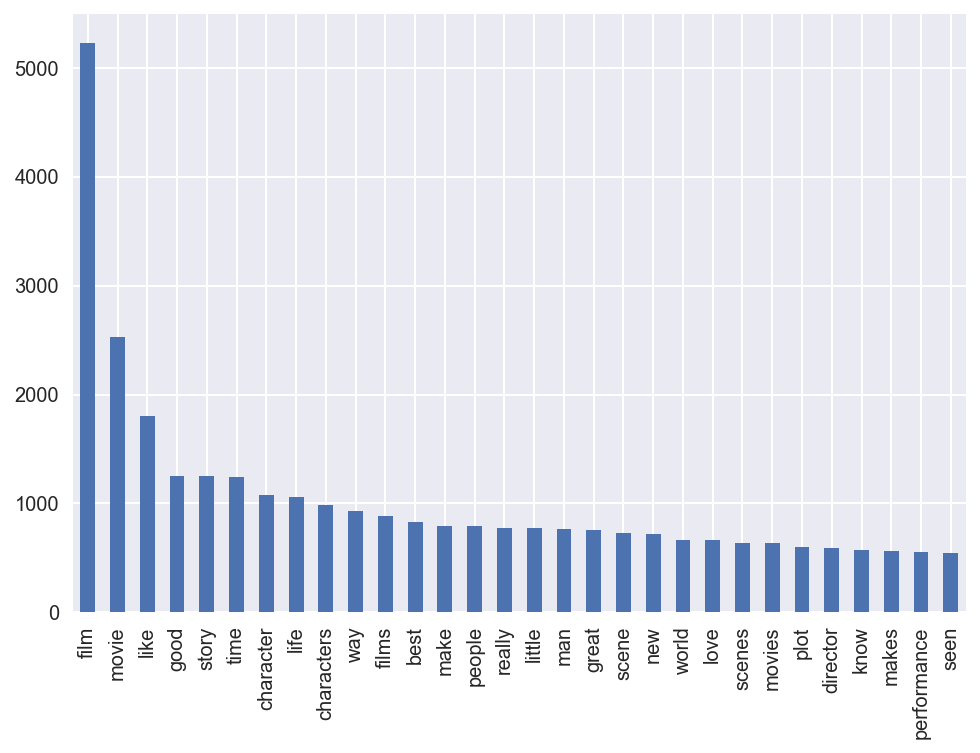

In [17]:
pos_cnt_df.sort_values(ascending=False)[:30].plot.bar()

### Plot the frequency distribution for the 30 words which occur most frequently in the negtive reviews

<AxesSubplot:>

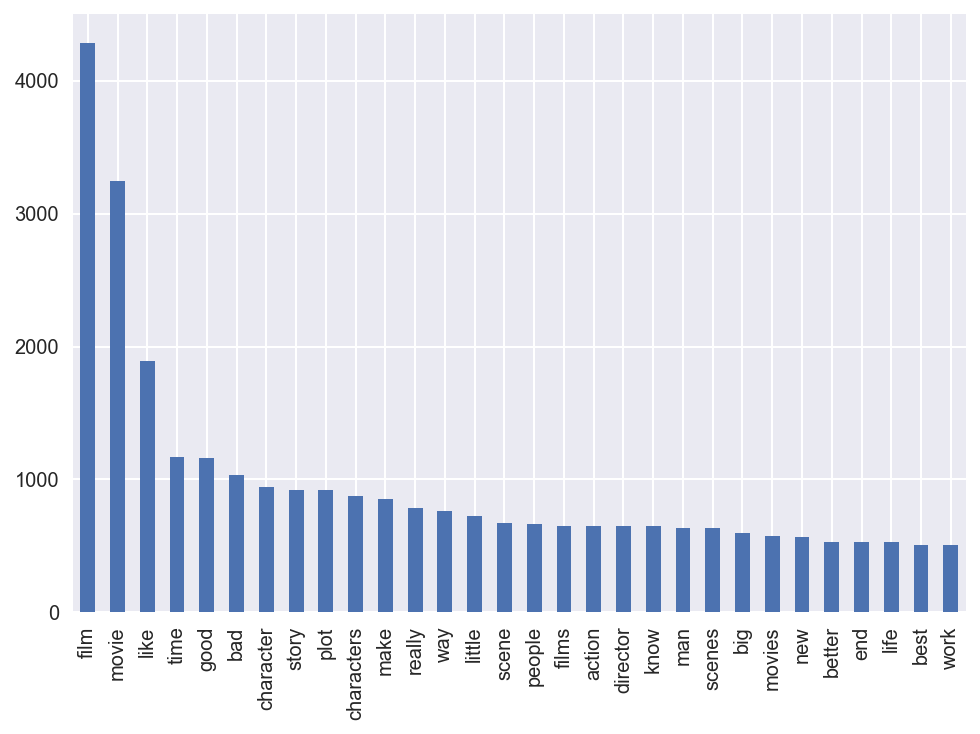

In [18]:
neg_cnt_df = whole_df[whole_df['is_pos'] == 0].iloc[:,3:].sum()
neg_cnt_df.sort_values(ascending=False)[:30].plot.bar()

### Summary
The top 30 words of Positive have like, love, good, best and great that show the emotion of liking. But, like, good, better and best also appear in the Negative reviews. In the negative reviews those words might construct sentences like other films is better than the current one. I think that the 'bad' appeared in the negative reviews can help model identify it is a negative one.

# Naïve Bayes Model Training

In [19]:
from sklearn import metrics

def my_confusion_matrix(actuals, predicts):
    
    actuals_category = pd.Categorical(actuals, categories=[0, 1])
    
    predicts_category = pd.Categorical(predicts, categories=[0, 1])
    
    
    cor = pd.crosstab(actuals_category, predicts_category, dropna=False, 
                     rownames = ['actual'], 
                     colnames = ['predict'])
    
    #print(cor)
    tp = cor.loc[1, 1]
    fp = cor.loc[0, 1]
    tn = cor.loc[0, 0]
    fn = cor.loc[1, 0]
    #print("tp = %d, fp = %d, tn = %d, fn = %d" %(tp,fp,tn,fn))
    
    result_map = {"tp":tp, "fp":fp, "tn":tn, "fn":fn}
    
    # print(result_map)
    return result_map

# specificity = tn / (tn + fp)
def my_specificity(actuals, predicts):
    cor_map = my_confusion_matrix(actuals, predicts)
    result = (cor_map['tn']) / (cor_map['tn'] + cor_map['fp'])
    
    #print("specificity = %.4f" %result)
    
    return result

# https://machinelearningmastery.com/probabilistic-model-selection-measures/
from math import log
from sklearn.metrics import mean_squared_error
 
# calculate aic for regression
def calculate_aic(n, mse, num_params):
    aic = n * log(mse) + 2 * num_params
    return aic

# use cross validation to fit train set
def my_cls_cv(model_name, model_, X_df, y_df, cv = 5, len_num_params = 0):
    
    auc_arr = []
    accuracy_arr = []
    precision_arr = []
    recall_arr = []
    f1_arr = []
    specificity_arr = []
    classErrR_arr = [] # classfication error rate = 1 - accuracy
    aic_arr = []
    
    kf = KFold(n_splits=cv, shuffle=True, random_state=1)
    
    for train_idx, test_idx in kf.split(X_df):

        X_train_, X_test_ = X_df.iloc[train_idx], X_df.iloc[test_idx]
        y_train_, y_test_ = y_df.iloc[train_idx], y_df.iloc[test_idx]

        #Train the model
        model_.fit(X_train_, y_train_) #Training the model
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test_, model_.predict(X_test_))
        auc_ = metrics.auc(fpr, tpr)
        auc_arr.append(auc_)
        
        accuracy = metrics.accuracy_score(y_test_, model_.predict(X_test_))
        accuracy_arr.append(accuracy)
        
        precision = metrics.precision_score(y_test_, model_.predict(X_test_))
        precision_arr.append(precision)
        
        recall = metrics.recall_score(y_test_, model_.predict(X_test_))
        recall_arr.append(recall)
        
        f1 = metrics.f1_score(y_test_, model_.predict(X_test_))
        f1_arr.append(f1)
        
        specificity = my_specificity(y_test_, model_.predict(X_test_))
        specificity_arr.append(specificity)
        
        classErrR_arr.append(1 - accuracy)
        
        # calculate the error
        mse = mean_squared_error(y_test_, model_.predict(X_test_))
        aic = calculate_aic(len(y_test_), mse, len_num_params)
        aic_arr.append(aic)
        
    #print(f"On the KFold = %d test set: Avg. accuracy = %.4f, Avg. precision = %.4f, Avg. auc = %.4f" %(cv, np.mean(accuracy_arr), np.mean(precision_arr), np.mean(roc_arr)))
    
    rst_dic = {"Features":len_num_params, "Avg_accuracy":np.mean(accuracy_arr), "Avg_precision": np.mean(precision_arr), 
               "Avg_auc" : np.mean(auc_arr), "Avg_recall": np.mean(recall_arr), "Avg_f1": np.mean(f1_arr), 
               "Avg_specificity": np.mean(specificity_arr), "Avg_classErrR": np.mean(classErrR_arr), "Avg_AIC": np.mean(aic_arr)}
    
    return rst_dic

### Split train and test set

In [20]:
# shuffle the dataframe
from sklearn.utils import shuffle
whole_df = shuffle(whole_df)

In [21]:
# split into train and test set
y = whole_df['is_pos']
X = whole_df.drop(columns=['filename','content', 'is_pos'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
X_train.head(3)

,aa,aaa,aaliyah,aardman,aaron,aback,abandon,abandoned,abandoning,abandonment,...,zoom,zooming,zooms,zoot,zorg,zorro,zucker,zuko,zwick,zwigoff
1854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# check the frequence of response
y_train.value_counts()

1    754
0    746
Name: is_pos, dtype: int64

It is a balance response.

In [24]:
# Using MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
model_MNB = MultinomialNB()
model_MNB.fit(X_train, y_train)

MultinomialNB()

In [25]:
mnb_result_dic = my_cls_cv("MultinomialNB", model_MNB, X_train, y_train, cv = 5, len_num_params = len(X_train.columns))

# print the model result
mnb_result_df = pd.DataFrame(mnb_result_dic, index=[0])
mnb_result_df

,Features,Avg_accuracy,Avg_precision,Avg_auc,Avg_recall,Avg_f1,Avg_specificity,Avg_classErrR,Avg_AIC
0,23467,0.796667,0.811039,0.796561,0.774769,0.792076,0.818352,0.203333,46452.697716


The cross validation shows that the model gets Avg. accuracy with 0.79, Avg. precision 0.81 and Avg. recall with 0.77. The response is balanced, so the results of cross validation for the model are acceptable.

# Model Testing
- Using test set to test the model
- Identify, display and discuss the 30 most informative features
- Classifing a new review whether is positive or negative 

### Using test set to test the model

In [26]:
y_predict = model_MNB.predict(X_test)

print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       254
           1       0.84      0.81      0.83       246

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



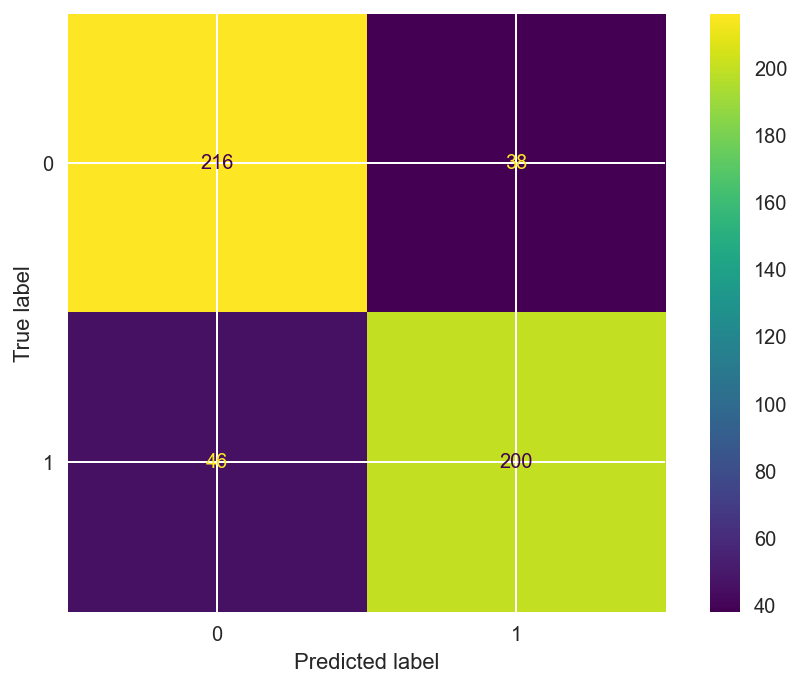

In [27]:
# show the confusion matrix
metrics.plot_confusion_matrix(model_MNB, X_test, y_test)

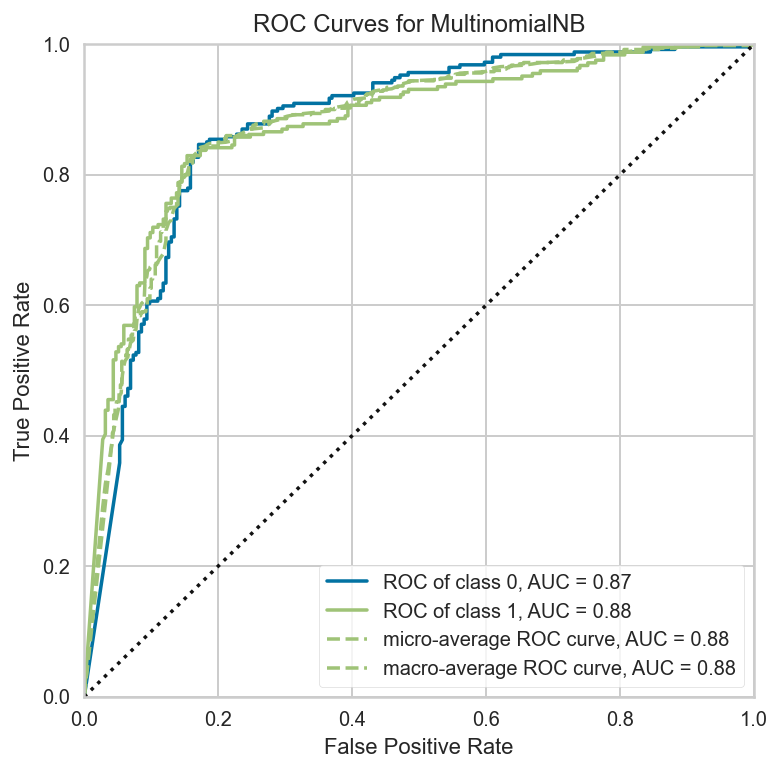

<AxesSubplot:title={'center':'ROC Curves for MultinomialNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [28]:
# draw a ROC curve.
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize=(6, 6))
roc_viz = ROCAUC(model_MNB)
roc_viz.fit(X_test, y_test)
roc_viz.score(X_test, y_test)
roc_viz.poof()

The model on the test set has:

accuracy = 0.83

recall = 0.81

precision = 0.84

AUC = 0.88

The model has a good performance on the test set.

### Identify, display and discuss the 30 most informative features

In [29]:
feature_names = X_train.columns

feature_log_prob_ ： Empirical log probability of features given a class, P(x_i|y).

The actual probability of P(x_i|y) is : np.exp(1) ** feature_log_prob_

np.exp(1) = 2.7182


N_yi = 1  # "best" appears only once in class `1`

N_y = 7   # There are total 7 features (count of all words) in class `1`

alpha = 1 # default value as per sklearn

n = 10    # size of vocabulary

Required_probability = (1+1)/(7+1*10) = 0.11764

In [30]:
# feature_log_prob_： Empirical log probability of features given a class, P(x_i|y).
log_prob_with_fns = sorted(zip(model_MNB.feature_log_prob_[0], feature_names), reverse = True)

In [31]:
whole_cnt_df = whole_df.iloc[:,3:].sum()

In [32]:
# show the most informative features
n=30
print("\tprob    |     feature          |     \tTotal cnt/Pos cnt/Neg cnt")
print("\t----------------------------------------------------")
for log_prob_, f_ in log_prob_with_fns[:n]:
    print("\t%.4f  |\t%-15s|\t%d/%d/%d" % (np.exp(1) ** log_prob_, f_, whole_cnt_df[f_], pos_cnt_df[f_], neg_cnt_df[f_]))

	prob    |     feature          |     	Total cnt/Pos cnt/Neg cnt
	----------------------------------------------------
	0.0139  |	film           |	9519/5232/4287
	0.0099  |	movie          |	5775/2528/3247
	0.0060  |	like           |	3691/1803/1888
	0.0038  |	good           |	2411/1248/1163
	0.0037  |	time           |	2411/1243/1168
	0.0031  |	bad            |	1396/361/1035
	0.0030  |	character      |	2020/1078/942
	0.0029  |	story          |	2170/1247/923
	0.0029  |	characters     |	1859/986/873
	0.0028  |	plot           |	1513/596/917
	0.0027  |	make           |	1642/791/851
	0.0024  |	really         |	1565/778/787
	0.0023  |	way            |	1693/929/764
	0.0022  |	little         |	1502/776/726
	0.0021  |	films          |	1536/884/652
	0.0021  |	people         |	1456/790/666
	0.0021  |	director       |	1237/586/651
	0.0021  |	scene          |	1397/727/670
	0.0020  |	know           |	1220/572/648
	0.0020  |	man            |	1401/764/637
	0.0020  |	scenes         |	1274/638/636
	0.0019

In the most informative features, we can see some emotional words, for example 'like', 'good', 'bad', 'better', and 'best'. The 'bad' might more help identify the negative reviews rather than the positive reviews.

### Classifing a new review whether is positive or negative 

Load the new comment & remove stop words and special characters

In [33]:
new_cmt_path = "https://raw.githubusercontent.com/Yuehao-Wang/DAV-6150/main/data/txt_sentoken/new_comment.txt"

In [34]:
# load comment & remove stopwords, special characters and lowcase
new_comment = get_txt(new_cmt_path)
new_comment

'things like film remember strongly man ingeniously fake looking polar bear costume funnier bear hercules new york extra less believable laugh ex drug addict martian tics child actors recite lines slowly carefully newspaper headline declaring santa kidnapped giant robot least appealing acting job film must mother claus elves frozen martians weapons seemed display exaggerated amount fear perhaps preferred acting style'

In [35]:
# Laplace method, return the multiply Probabilities.
import math
from nltk.tokenize import word_tokenize

def laplace_probability(cnt_df, new_comment):
    
    # count all values in df, it is not length of df
    total_cnts_features_pos = cnt_df.sum(axis=0)
    pos_cnt_dic = cnt_df.to_dict()
    
    prob_pos_with_ls = []
    
    # split sentence to words
    new_word_list = word_tokenize(new_comment)
    # length of all features.
    len_total_features = len(X_train.columns)

    for word in new_word_list:
        freq = 0
        if word in pos_cnt_dic:
            freq = pos_cnt_dic[word]

        prob_pos_with_ls.append((freq + 1)/(total_cnts_features_pos + len_total_features))

    new_comment_laplace_pos_dic = dict(zip(new_word_list, prob_pos_with_ls))

    v1 = math.prod(new_comment_laplace_pos_dic.values())
    return v1

In [36]:
# P(pos) = 0.5, because we have 1000 positive and 1000 negtive
P_pos = 0.5

# P(neg) = 0.5, because we have 1000 positive and 1000 negtive
P_neg = 0.5

In [37]:
# get the laplace probability of P(new comment|pos)
P_new_pos = laplace_probability(pos_cnt_df, new_comment)
print("P(new comment|pos) = " + str(P_new_pos))

P(new comment|pos) = 3.227165456317299e-234


In [38]:
# P(pos|new comment) = P(new comment|pos)*P(pos)
P_pos_new = np.multiply(P_new_pos, P_pos)

print("P(pos|new comment) = P(new comment|pos)*P(pos) = " + str(P_pos_new))


P(pos|new comment) = P(new comment|pos)*P(pos) = 1.6135827281586495e-234


In [39]:
# get the laplace probability of P(new comment|neg)
P_new_neg = laplace_probability(neg_cnt_df, new_comment)
print("P(new comment|neg) = " + str(P_new_neg))

P(new comment|neg) = 1.236675436445567e-233


In [40]:
# P(neg|new comment) = P(new comment|neg)*P(neg)
P_neg_new = np.multiply(P_new_neg, P_neg)

print("P(neg|new comment) = P(new comment|neg)*P(neg) = " + str(P_neg_new))


P(neg|new comment) = P(new comment|neg)*P(neg) = 6.183377182227835e-234


In [41]:
if P_pos_new > P_neg_new:
    print("The new comment is more positive")
else:
    print("The new comment is more negtive")

The new comment is more negtive


Therefore the new comment will be classified as negtive.

# Conclustion

The stopwords can reduce the features of Term-Document matrix. Actually, I did a test that removed the don and doesn from stopwords. The performance of model with don and doesn is less than the model without don and doesn.

The frequence of bad (pos/neg = 361/1035), better (pos/neg = 391/531) and best (pos/neg = 829/504) between positive and negative can help model identify whether the review is positive or not. 

The laplace method can help identify a new content that might not appear in the train and test set whether is positive or not.

# Reference

http://blog.chapagain.com.np/python-nltk-sentiment-analysis-on-movie-reviews-natural-language-processing-nlp/

https://medium.com/analytics-vidhya/naive-bayes-classifier-for-text-classification-556fabaf252b

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

https://www.crummy.com/software/BeautifulSoup/bs4/doc/